In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from SHIPS_ML_model_funcs import calc_AUPD, calculate_PD_curves
from SHIPS_plotting import plot_roc_curve, plot_precision_recall_vs_threshold,add_model_results,make_performance_diagram_background
from SHIPS_plotting import plot_CSI_vs_bias, plot_PD_curves_compare_models 
import matplotlib.colors

##### File info for RF results

In [2]:
RF_score = 'gini'
yr_start = 2019
yr_end = 2021
mask = 'SIMPLE_MASK'
stand_str = 'STANDARDIZED'
RI_thresh = 30
weights = 'default'
N_samples_RF = 10
scoring = 'f1_weighted'
RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
RF_ext = '_{RF_score}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(RF_score='Random Forest',yr_start=yr_start,yr_end=yr_end,mask=mask,
            stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)


##### File info for LR results

lbfgs_SHIPS_SIMPLE_RI_vs_no_RI_2005-2020_SIMPLE_MASK_STANDARDIZED_RI_thresh_40weights_default_wts_15_samples.csv

In [3]:
LR_models = ['lbfgs','saga']
valid_yr_start = 2019
valid_yr_end = 2021
#N_samples_LR = 15
LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
LR_ext1 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(model=LR_models[0],yr_start=valid_yr_start,
                                            yr_end=valid_yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)
LR_ext2 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(model=LR_models[1],yr_start=valid_yr_start,yr_end=valid_yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)

##### Precision vs recall for LR vs RF

In [4]:
p_vs_r_RF = pd.read_csv(RF_dir+'Prec_vs_recall'+RF_ext)
p_vs_r_LR1 = pd.read_csv(LR_dir+'Prec_vs_recall'+LR_ext1)
p_vs_r_LR2 = pd.read_csv(LR_dir+'Prec_vs_recall'+LR_ext2)
#
prec_vs_rec = pd.concat([p_vs_r_RF,p_vs_r_LR1,p_vs_r_LR2])

##### Also need the confusion matrix results

In [5]:
cm_RF = pd.read_csv(RF_dir+'Conf_Matrix'+RF_ext)
#cm_RF = cm_RF.rename(columns={'Model':'Model Name'})
cm_LR1 = pd.read_csv(LR_dir+'Conf_Matrix'+LR_ext1)
cm_LR2 = pd.read_csv(LR_dir+'Conf_Matrix'+LR_ext2)
#
cm_res = pd.concat([cm_LR1,cm_LR2,cm_RF])

#### ROC results

In [6]:
roc_RF = pd.read_csv(RF_dir+'ROC_AUC_vals'+RF_ext)
#cm_RF = cm_RF.rename(columns={'Model':'Model Name'})
roc_LR1 = pd.read_csv(LR_dir+'ROC_AUC_vals'+LR_ext1)
roc_LR2 = pd.read_csv(LR_dir+'ROC_AUC_vals'+LR_ext2)
#
roc_res = pd.concat([roc_LR1,roc_LR2,roc_RF])

In [7]:
basin_ALL = cm_res['BASIN'].unique().tolist()
roc_res.groupby(['BASIN','Model']).mean()
cm_res

,Unnamed: 0,N_predicted,POD,Category Names,Threat,Hits,Misses,Correct Negs,False Alarms,Category,...,SR,FAR,N_actual,BIAS,BASIN,C,Max Iter,Valid Years,Model,Fold
0,0,99,0.776860,not RI,0.746032,94,27,13,5,0.0,...,0.949495,0.050505,121,0.818182,ATLANTIC,100.0,100.0,"[2019, 2020]",lbfgs,0
1,1,40,0.722222,RI,0.288889,13,5,94,27,1.0,...,0.325000,0.675000,18,2.222222,ATLANTIC,100.0,100.0,"[2019, 2020]",lbfgs,0
2,0,48,0.573333,not RI,0.537500,43,32,21,5,0.0,...,0.895833,0.104167,75,0.640000,EAST_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
3,1,53,0.807692,RI,0.362069,21,5,43,32,1.0,...,0.396226,0.603774,26,2.038462,EAST_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
4,0,93,0.597122,not RI,0.557047,83,56,21,10,0.0,...,0.892473,0.107527,139,0.669065,WEST_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
5,1,77,0.677419,RI,0.241379,21,10,83,56,1.0,...,0.272727,0.727273,31,2.483871,WEST_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
6,0,120,0.643275,not RI,0.607735,110,61,22,10,0.0,...,0.916667,0.083333,171,0.701754,SOUTH_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
7,1,83,0.687500,RI,0.236559,22,10,110,61,1.0,...,0.265060,0.734940,32,2.593750,SOUTH_PACIFIC,100.0,100.0,"[2019, 2020]",lbfgs,0
8,0,360,0.652174,not RI,0.615672,330,176,77,30,0.0,...,0.916667,0.083333,506,0.711462,ALL,100.0,100.0,"[2019, 2020]",lbfgs,0
9,1,253,0.719626,RI,0.272085,77,30,330,176,1.0,...,0.304348,0.695652,107,2.364486,ALL,100.0,100.0,"[2019, 2020]",lbfgs,0


#### Performance Diagram

In [8]:
cm_res['BASIN'] = cm_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
prec_vs_rec['BASIN'] = prec_vs_rec['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
roc_res['BASIN'] = roc_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

fig_format = 'pdf'

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


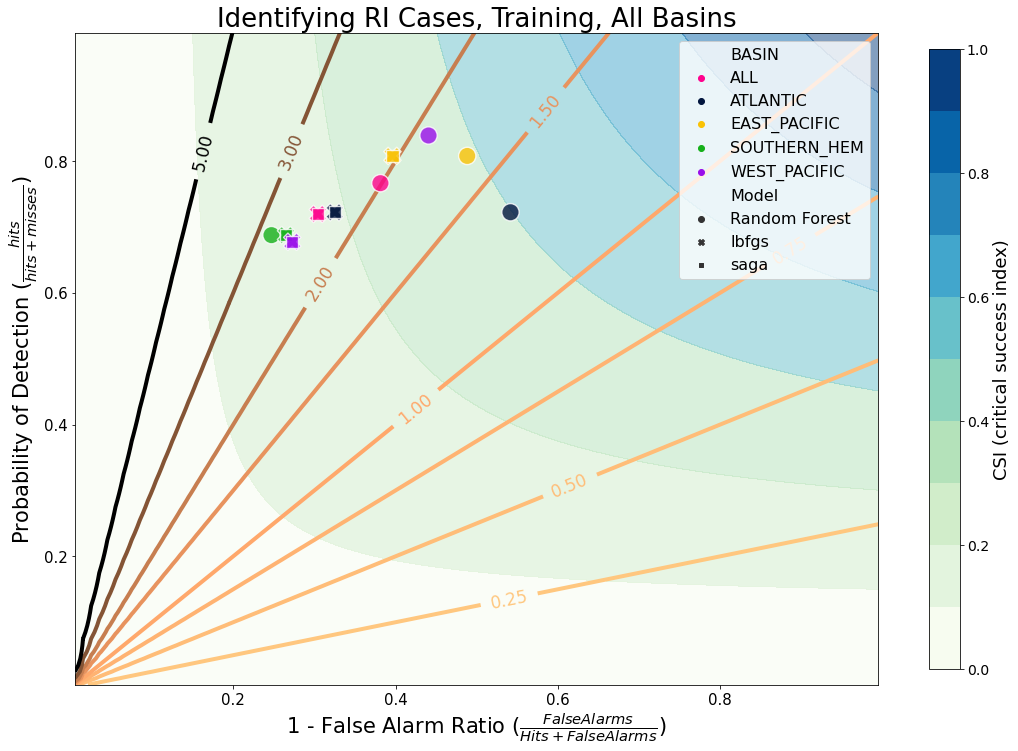

In [9]:
fig5,ax5 = plt.subplots(1,1,figsize=(18,12))
make_performance_diagram_background(ax5)
#for ibasin in basin_foo:
cm_res['Fold'] = 0
add_model_results(ax5,cm_res.sort_values('Model'))
ax5.set_title('Identifying RI Cases, Training, All Basins'.format(scoring=scoring),fontsize=26)
fig5.savefig('Figures/VALID_PD_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)


In [10]:
basin_ALL = cm_res['BASIN'].unique().tolist()
basin_ALL

['ATLANTIC', 'EAST_PACIFIC', 'WEST_PACIFIC', 'SOUTHERN_HEM', 'ALL']

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not

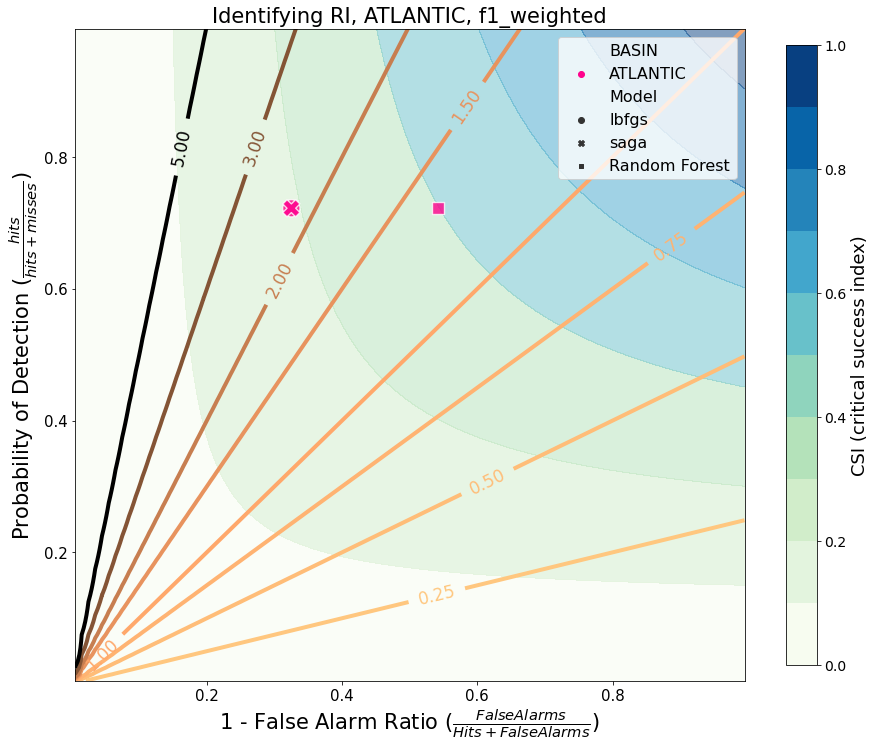

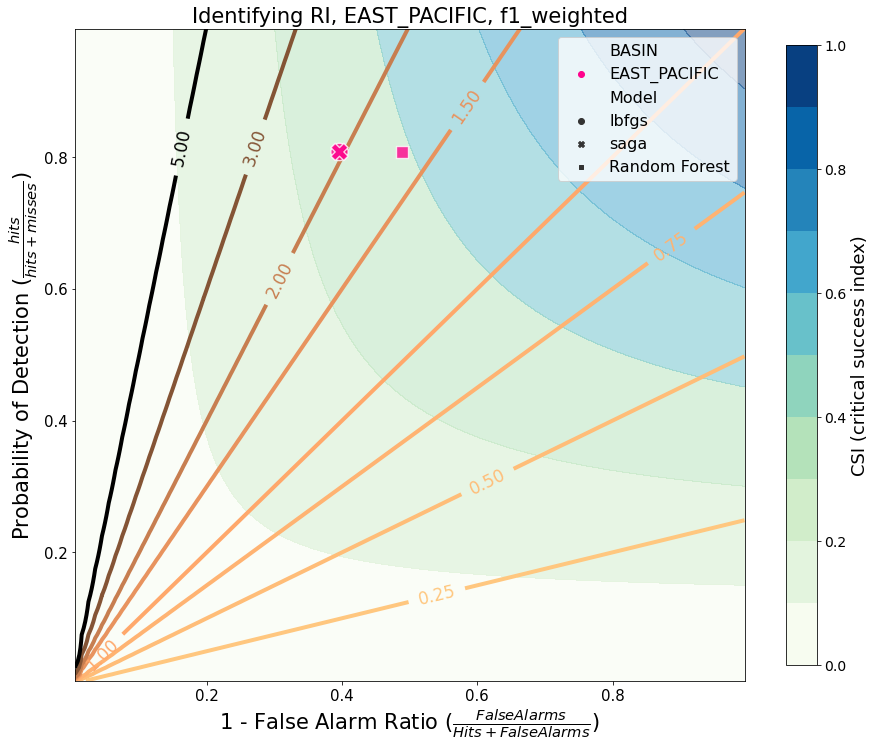

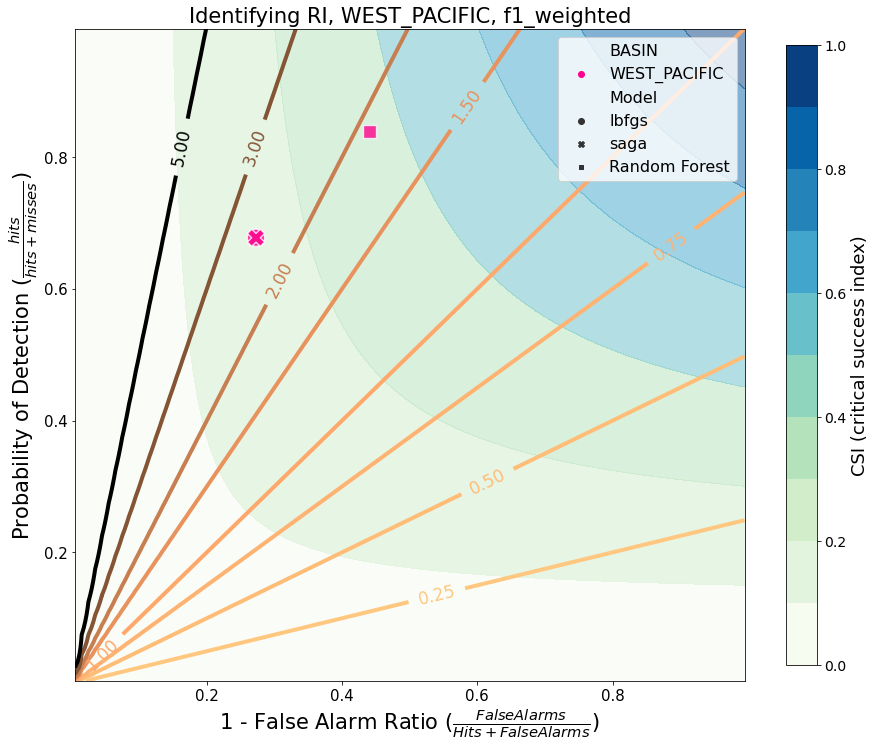

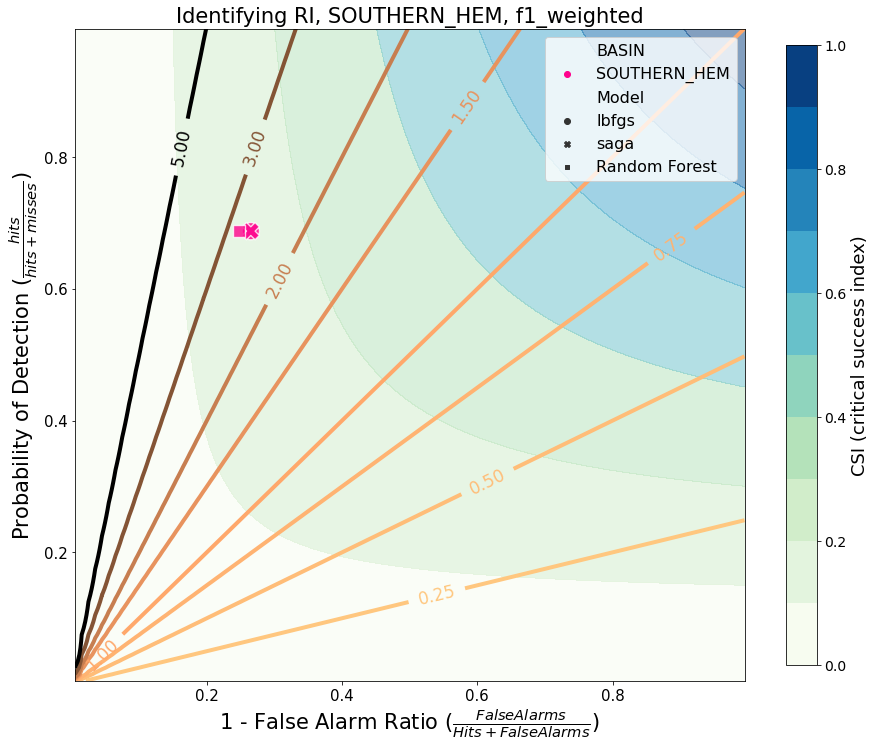

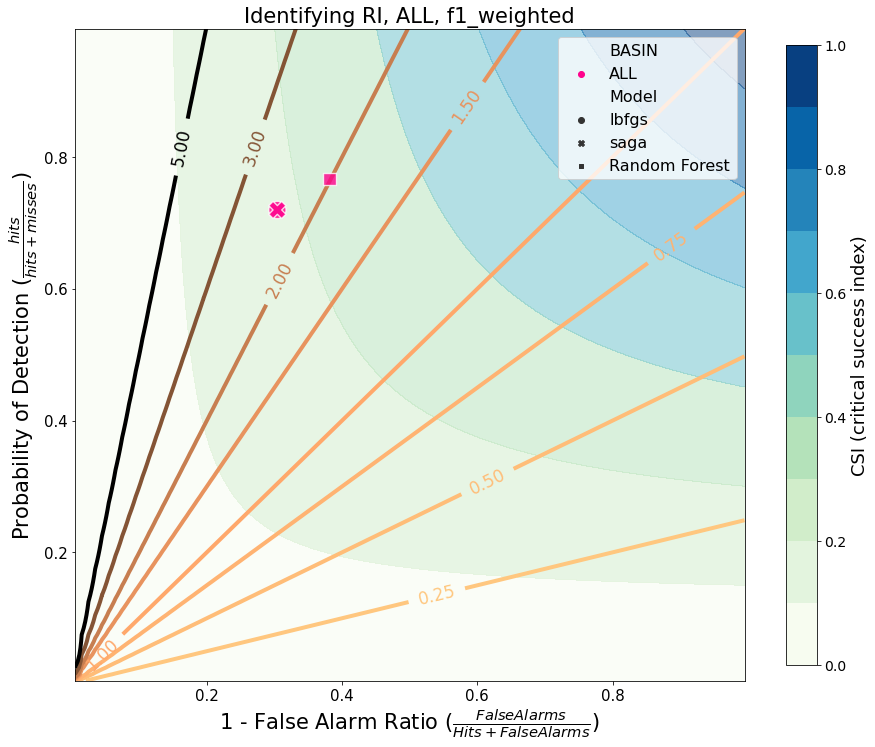

In [11]:
for basin_sel in basin_ALL:
    fig6,ax6 = plt.subplots(1,1,figsize=(15,12))
    #basin_sel = 'ALL'
    cmp = cm_res.set_index(['BASIN']).loc[basin_sel]
    make_performance_diagram_background(ax6)
    add_model_results(ax6,cmp)
    ax6.set_title('{basin}'.format(basin=basin_sel),fontsize=22)
    ax6.set_title('Identifying RI, {basin_sel}, {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=21)
    fig6.savefig('Figures/VALID_PD_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                     scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

#### Get baseline

$$Baseline = \frac{N_{yes}}{N_{yes} + N_{no}} $$

In [12]:
cm_group = cm_res.groupby(['BASIN','Model','Category Names','Fold']).mean()
baselines = cm_group.xs('RI',level=2)['N_actual']/cm_group.xs('not RI',level=2)['N_actual']

#### Plot Precision vs Recall

In [13]:
palette = {'xkcd:turquoise','xkcd:coral','xkcd:tangerine'}
#basin_ALL = cm_res['BASIN'].unique().tolist()

/home/mmcgraw/miniconda3/envs/SHIPS/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


<AxesSubplot:xlabel='Recall', ylabel='Precision'>

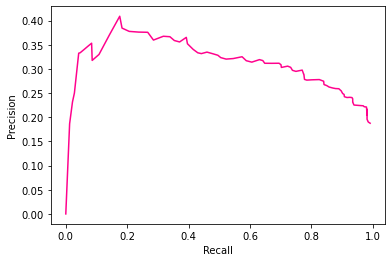

In [14]:
pr_smooth = prec_vs_rec.copy().set_index(['BASIN','Model','CLASS'])
pr_smooth_x = pr_smooth.xs(('ALL','saga','RI')).reset_index()
pr_smooth_x['Thresh rnd'] = pr_smooth_x['Thresholds'].round(2)
prsmplt = pr_smooth_x.groupby(['Thresh rnd']).mean()
sns.lineplot(data=prsmplt.reset_index(),x='Recall',y='Precision')

In [15]:
#prp.groupby(['Model','Precision (rnd)','Recall (rnd)']).mean().xs('lbfgs')


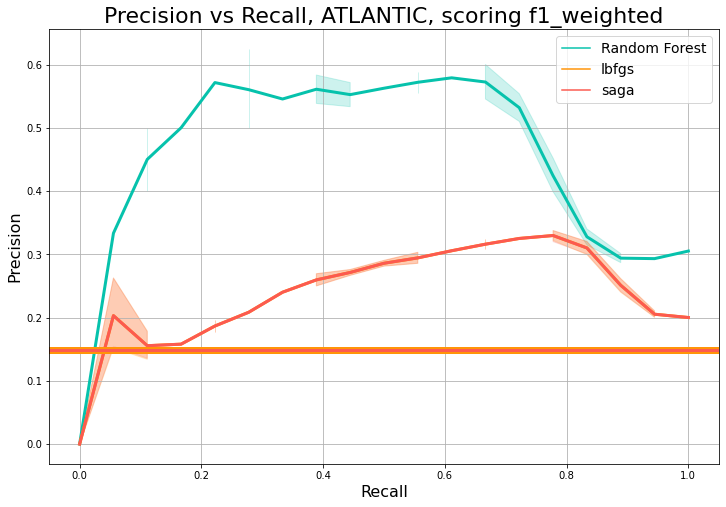

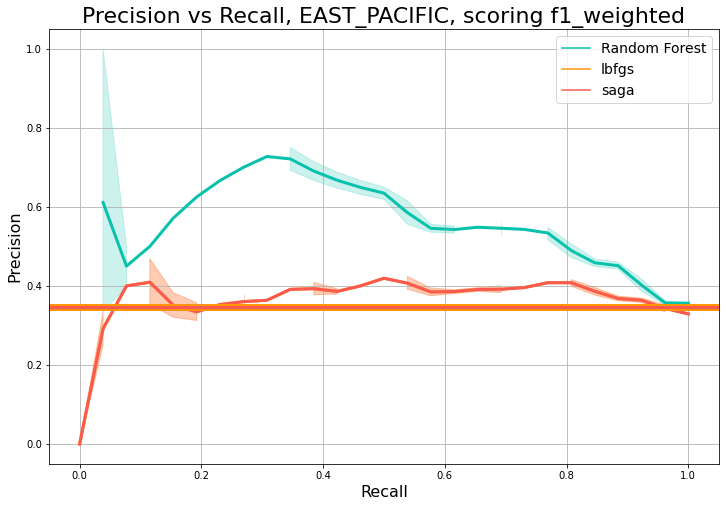

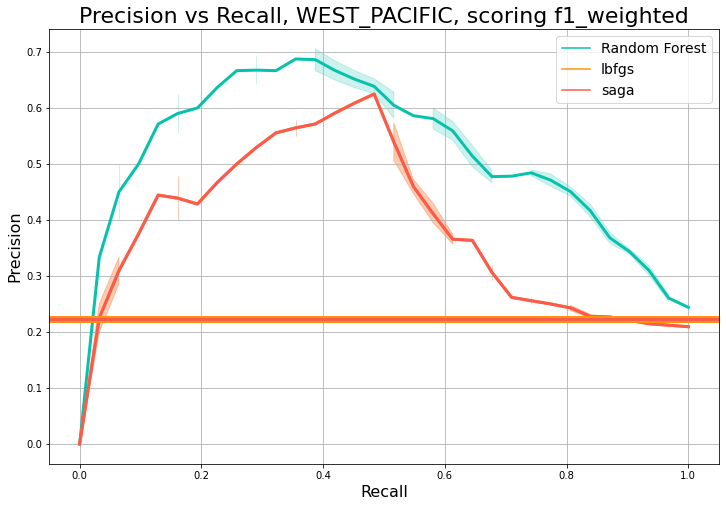

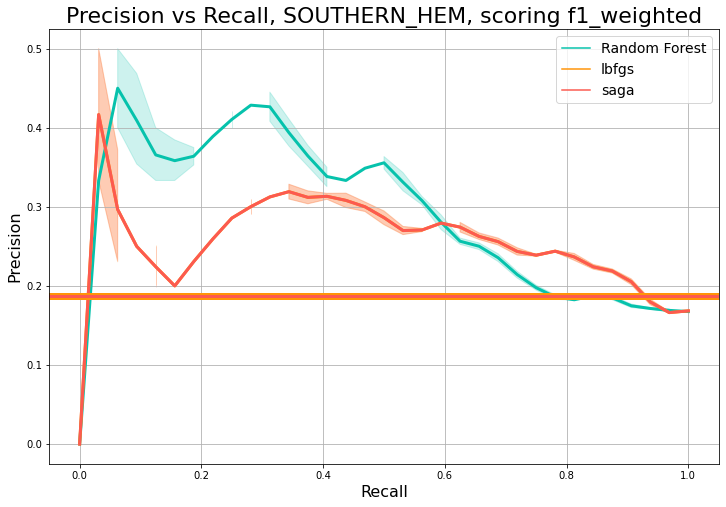

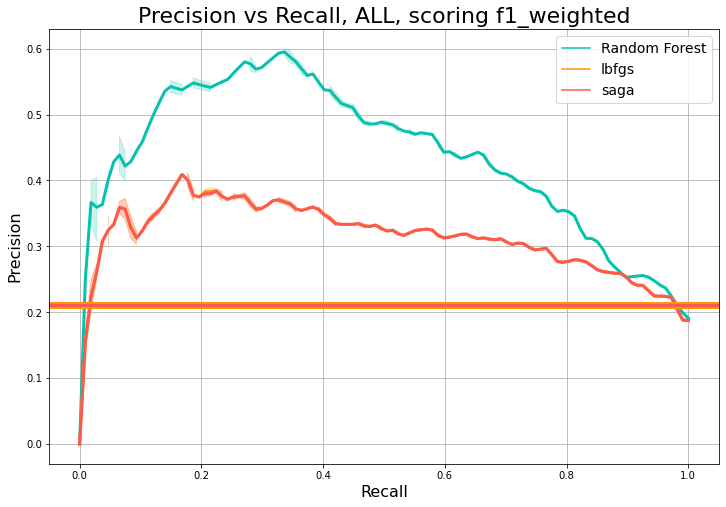

In [16]:
prec_vs_rec_plt = prec_vs_rec.copy()
baselines_mean = baselines.mean(level=(0,1))
prec_vs_rec_plt[['Thresholds (rnd)','Precision (rnd)','Recall (rnd)']] = prec_vs_rec_plt[['Thresholds','Precision','Recall']]#.round(3)
for basin_sel in basin_ALL:
    fig1, ax1 = plt.subplots(1,1,figsize=(12,8))
    #basin_sel = 'ALL'
    prp = prec_vs_rec_plt.set_index(['BASIN']).loc[basin_sel]
    sns.lineplot(data=prp.reset_index().sort_values(['Model']),x='Recall (rnd)',y='Precision (rnd)',hue='Model',palette=sns.set_palette(palette),
                linewidth = 3)
    #
    ax1.axhline(baselines.xs((basin_sel,'Random Forest')).mean(),
            color=sns.color_palette()[0],linewidth=3)
    ax1.axhline(baselines.xs((basin_sel,'lbfgs')).mean(),
            color=sns.color_palette()[1],linewidth=7)
    ax1.axhline(baselines.xs((basin_sel,'saga')).mean(),
            color=sns.color_palette()[2],linewidth=3)
    ax1.set_xlabel('Recall',fontsize=16)
    ax1.set_ylabel('Precision',fontsize=16)
    ax1.grid()
    ax1.legend(fontsize=14)
    ax1.set_title('Precision vs Recall, {basin_sel}, scoring {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=22)
    fig1.savefig('Figures/VALID_Precision_vs_Recall_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                          scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)
    

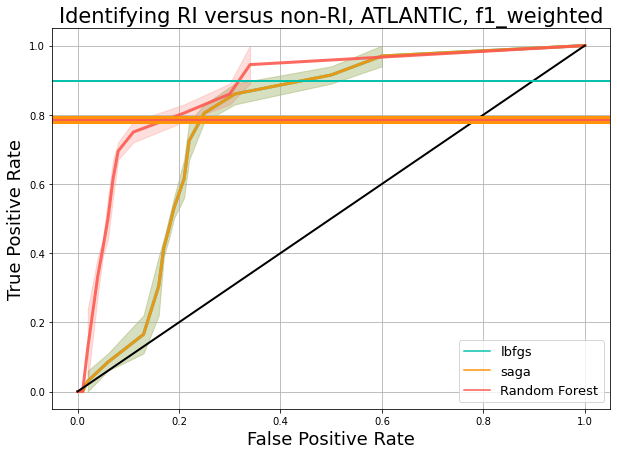

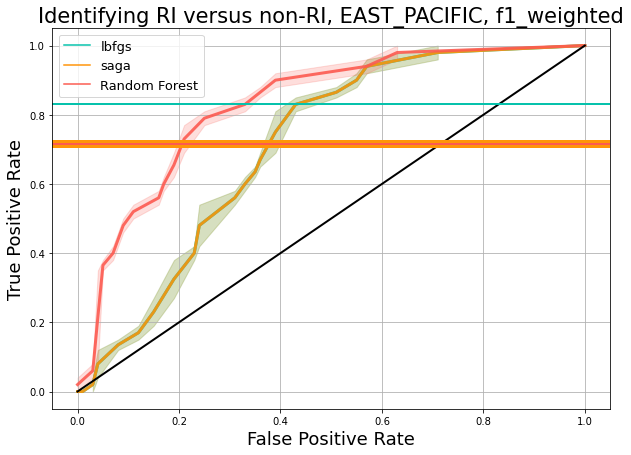

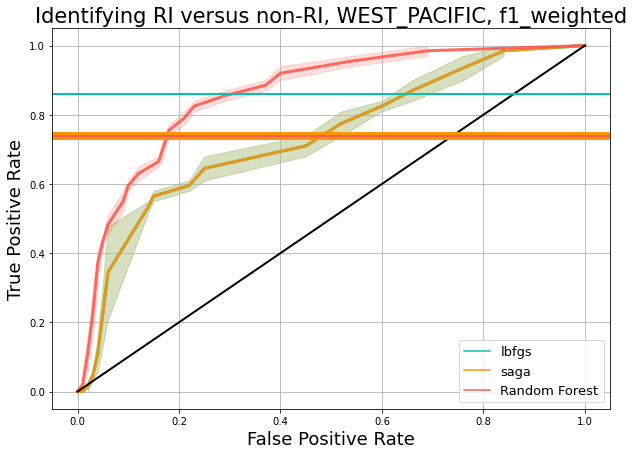

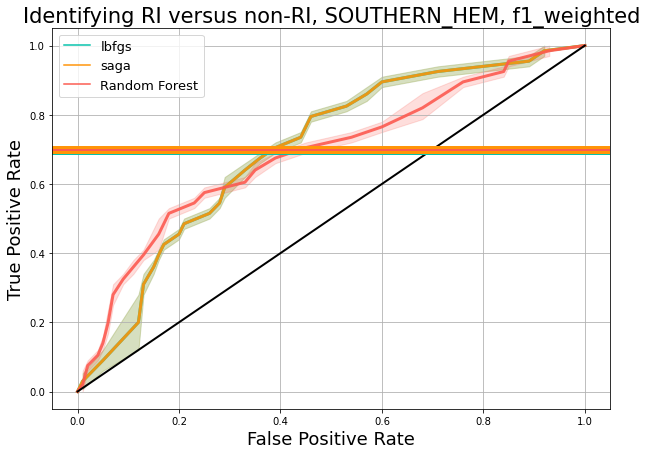

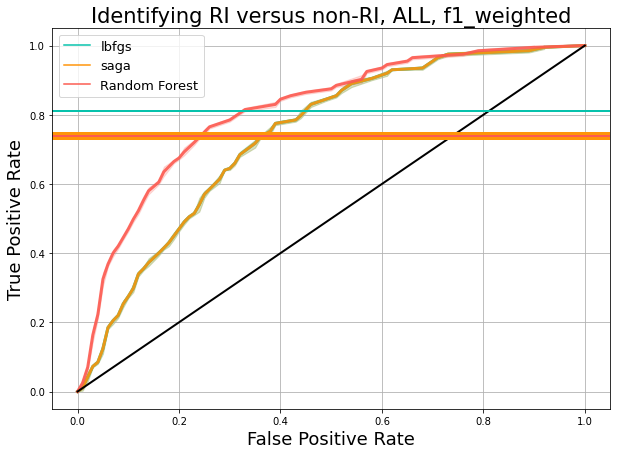

In [17]:
for basin_sel in basin_ALL:
    fig2,ax2 = plt.subplots(1,1,figsize=(10,7))

    roc_vals_plt = roc_res.set_index(['BASIN']).xs(basin_sel).reset_index()
    roc_vals_plt[['FPR round','TPR round']] = roc_vals_plt[['False Positive Rate','True Positive Rate']].round(2)
    #roc_min = roc_vals_plt['AUC ROC Score'].min()
    #roc_max = roc_vals_plt['AUC ROC Score'].max()

    sns.lineplot(data=roc_vals_plt,x='FPR round',y='TPR round',hue='Model',ax=ax2,
                alpha=0.9,linewidth=3)
    ax2.plot([0,1],[0,1],color='k',linewidth=2)
    #
    auc_scores = roc_vals_plt.groupby(['Model'])['AUC ROC Score'].mean()
    ax2.axhline(auc_scores.loc['Random Forest'],color=sns.color_palette()[0],linewidth=2)
    ax2.axhline(auc_scores.loc['lbfgs'],color=sns.color_palette()[1],linewidth=8)
    ax2.axhline(auc_scores.loc['saga'],color=sns.color_palette()[2],linewidth=2)
    #ax2.axhspan(roc_min,roc_max,color='xkcd:gray',alpha=0.25,label='AUC Score')
    ax2.set_xlabel('False Positive Rate',fontsize=18)
    ax2.set_ylabel('True Positive Rate',fontsize=18)
    #roc_vals_mean = roc_vals_plt.groupby(roc_vals_plt['False Positive Rate'].round(2))[['True Positive Rate',
    #                                'AUC Thresholds']].mean().reset_index()
    #roc_vals_mean.plot(x='False Positive Rate',y='True Positive Rate',ax=ax2,color='xkcd:tangerine',linewidth=5,
    #                  label='ROC curve')
    ax2.legend(fontsize=13)
    ax2.grid()
    ax2.set_title('Identifying RI versus non-RI, {basin_sel}, {scoring}'.format(basin_sel=basin_sel,scoring=scoring),fontsize=21)
    fig2.savefig('Figures/VALID_ROC_all_models_{basin_sel}_{scoring}.{fig_format}'.format(basin_sel=basin_sel,
                        scoring=scoring,fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)
    

In [18]:
cm_res['BIAS'] = (cm_res['Hits']+cm_res['False Alarms'])/(cm_res['Hits'] + cm_res['Misses'])


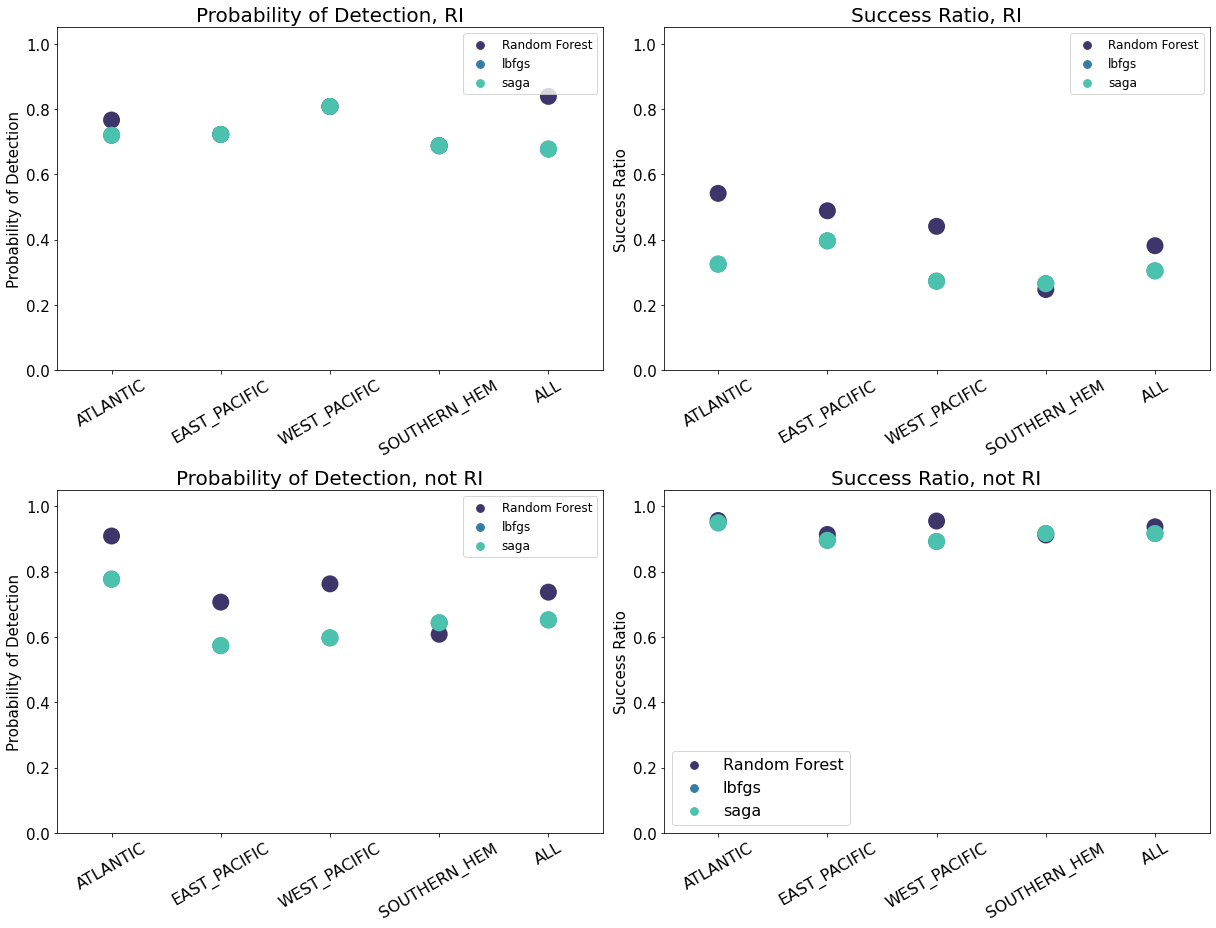

In [19]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(17,13))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.stripplot(data=cm_plt_total.xs('RI').reset_index().sort_values(['Model']),
              x='BASIN',y='POD',hue='Model',palette='mako',ax=ax6a,
             s=17,jitter=False)
ax6a.set_ylabel('Probability of Detection',fontsize=15)
#ax6a.get_legend().remove()
ax6a.legend(fontsize=12)
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Probability of Detection, RI',fontsize=20)
ax6a.set_xlabel(None)
ax6a.set_ylim([0,1.05])
ax6a.tick_params(axis='y',labelsize=15)
#
sns.stripplot(data=cm_plt.xs('RI').reset_index().sort_values(['Model']),
              x='BASIN',y='SR',hue='Model',palette='mako',ax=ax6b,s=17,jitter=False)
ax6b.set_ylabel('Success Ratio',fontsize=15)
ax6b.legend(fontsize=12)
#ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('Success Ratio, RI',fontsize=20)
ax6b.set_xlabel(None)
ax6b.set_ylim([0,1.05])
ax6b.tick_params(axis='y',labelsize=15)
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),
              x='BASIN',y='POD',hue='Model',palette='mako',ax=ax6c,s=17,jitter=False)
ax6c.set_ylabel('Probability of Detection',fontsize=15)
ax6c.legend(fontsize=12)
#ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Probability of Detection, not RI',fontsize=20)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
ax6c.set_ylim([0,1.05])
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),
              x='BASIN',y='SR',hue='Model',palette='mako',ax=ax6d,s=17,jitter=False)
ax6d.set_ylabel('Success Ratio',fontsize=15)
ax6d.legend(fontsize=16)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('Success Ratio, not RI',fontsize=20)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y',labelsize=15)
ax6d.set_ylim([0,1.05])
#
fig6.tight_layout()
#fig6.suptitle('Probability o')
fig6.savefig('Figures/VALID_POD_SR_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,
                                        fig_format=fig_format),
                format = fig_format,bbox_inches='tight',dpi=350)

Performance diagram

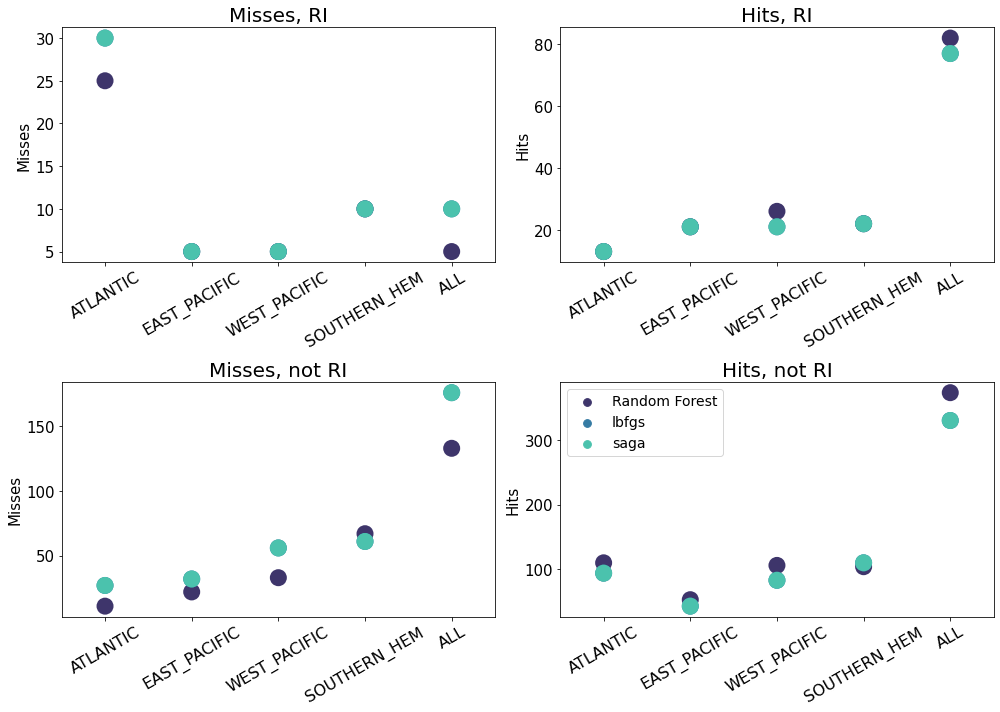

In [20]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(14,10))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.stripplot(data=cm_plt_total.xs('RI').reset_index().sort_values(['Model']),x='BASIN',y='Misses',hue='Model',palette='mako',ax=ax6a,s=17,
              jitter=False)
ax6a.set_ylabel('Misses',fontsize=15)
ax6a.get_legend().remove()
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Misses, RI',fontsize=20)
ax6a.set_xlabel(None)
ax6a.tick_params(axis='y',labelsize=15)
#ax6a.set_ylim([0,150])
#
sns.stripplot(data=cm_plt.xs('RI').reset_index().sort_values(['Model']),x='BASIN',y='Hits',hue='Model',palette='mako',
              ax=ax6b,s=17,jitter=False)
ax6b.set_ylabel('Hits',fontsize=15)
ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('Hits, RI',fontsize=20)
ax6b.set_xlabel(None)
ax6b.tick_params(axis='y',labelsize=15)
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),x='BASIN',y='Misses',hue='Model',
              palette='mako',ax=ax6c,s=17,jitter=False)
ax6c.set_ylabel('Misses',fontsize=15)
ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Misses, not RI',fontsize=20)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),x='BASIN',y='Hits',hue='Model',palette='mako',ax=ax6d,
              s=17,jitter=False)
ax6d.set_ylabel('Hits',fontsize=15)
ax6d.legend(fontsize=14)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('Hits, not RI',fontsize=20)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y', labelsize= 15)

#
fig6.tight_layout()
fig6.savefig('Figures/VALID_Misses_Hits_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
                format =fig_format,bbox_inches='tight',dpi=350)

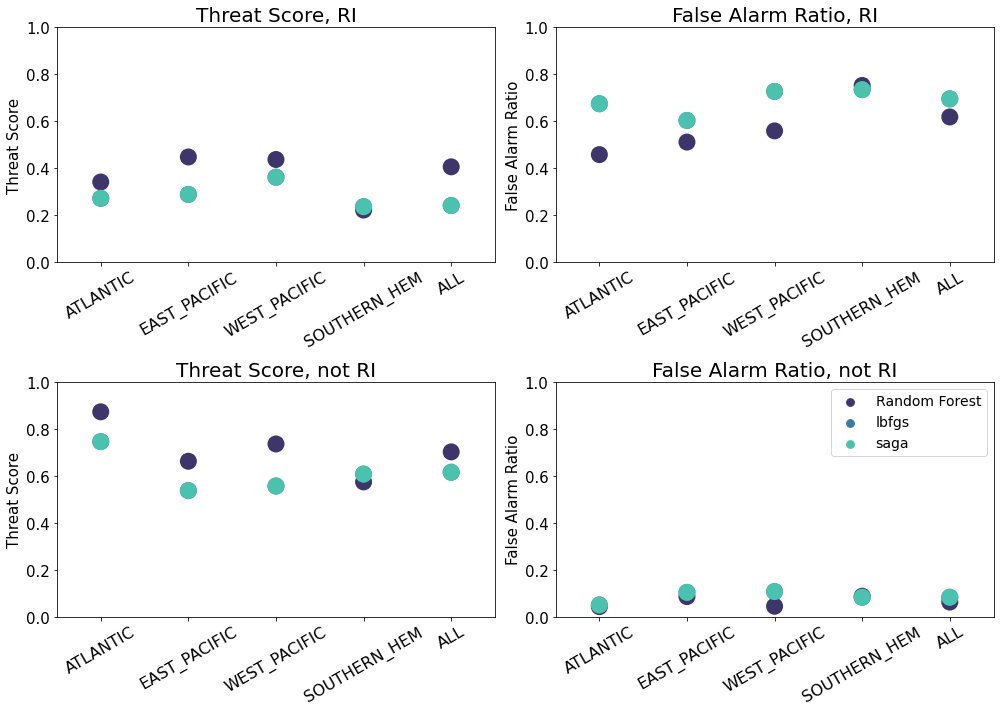

In [21]:
fig6,((ax6a,ax6b),(ax6c,ax6d)) = plt.subplots(2,2,figsize=(14,10))
cm_plt = cm_res.set_index(['Category Names'])
cm_plt_total = cm_plt.reset_index().groupby(['Category Names','BASIN','Model','Fold']).mean()
#cm_plt_norm = 
sns.stripplot(data=cm_plt_total.xs('RI').reset_index().sort_values(['Model']),
              x='BASIN',y='Threat',hue='Model',palette='mako',ax=ax6a,s=17,jitter=False)
ax6a.set_ylabel('Threat Score',fontsize=15)
ax6a.get_legend().remove()
ax6a.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6a.set_title('Threat Score, RI',fontsize=20)
ax6a.set_xlabel(None)
ax6a.tick_params(axis='y',labelsize=15)
ax6a.set_ylim([0,1])
#ax6a.set_ylim([0,150])
#
sns.stripplot(data=cm_plt.xs('RI').reset_index().sort_values(['Model']),
              x='BASIN',y='FAR',hue='Model',palette='mako',ax=ax6b,s=17,jitter=False)
ax6b.set_ylabel('False Alarm Ratio',fontsize=15)
ax6b.get_legend().remove()
ax6b.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6b.set_title('False Alarm Ratio, RI',fontsize=20)
ax6b.set_xlabel(None)
ax6b.tick_params(axis='y',labelsize=15)
ax6b.set_ylim([0,1])
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),
              x='BASIN',y='Threat',hue='Model',palette='mako',ax=ax6c,s=17,jitter=False)
ax6c.set_ylabel('Threat Score',fontsize=15)
ax6c.get_legend().remove()
ax6c.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6c.set_title('Threat Score, not RI',fontsize=20)
ax6c.set_xlabel(None)
ax6c.tick_params(axis='y',labelsize=15)
ax6c.set_ylim([0,1])
#
sns.stripplot(data=cm_plt.xs('not RI').reset_index().sort_values(['Model']),
            x='BASIN',y='FAR',hue='Model',palette='mako',ax=ax6d,s=17,jitter=False)
ax6d.set_ylabel('False Alarm Ratio',fontsize=15)
ax6d.legend(fontsize=14)
ax6d.set_xticklabels(basin_ALL,fontsize=16,rotation=30)
ax6d.set_title('False Alarm Ratio, not RI',fontsize=20)
ax6d.set_xlabel(None)
ax6d.tick_params(axis='y', labelsize= 15)
ax6d.set_ylim([0,1])
#
fig6.tight_layout()
fig6.savefig('Figures/VALID_Threat_FAR_all_models_all_basins_{scoring}.{fig_format}'.format(scoring=scoring,fig_format=fig_format),
              format = fig_format,bbox_inches='tight',dpi=350)

/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:214: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(success_ratio_matrix, pod_matrix, csi_matrix,
/local/home/mmcgraw/SHIPS/SHIPS_clean/SHIPS_plotting.py:229: UserWarning: The following kwargs were not used by contour: 'axes'
  bias_contour_object = plt.contour(


Random Forest
lbfgs
saga


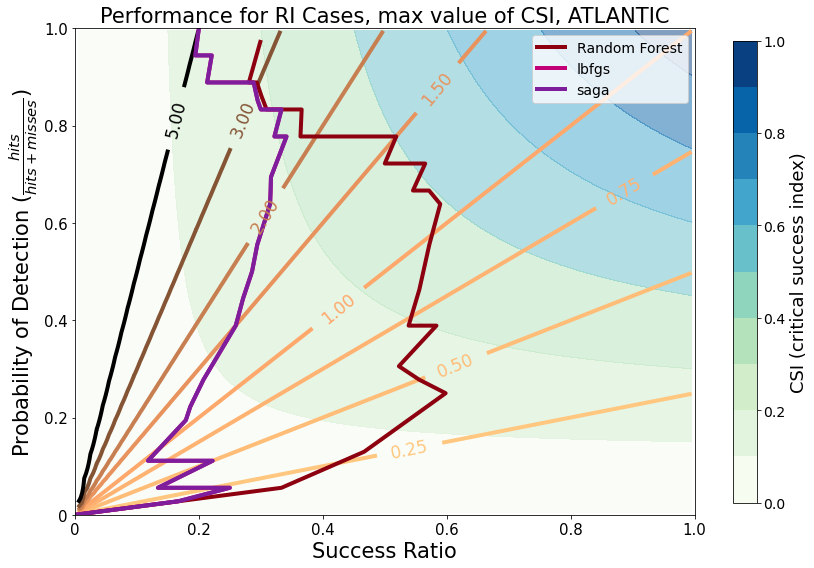

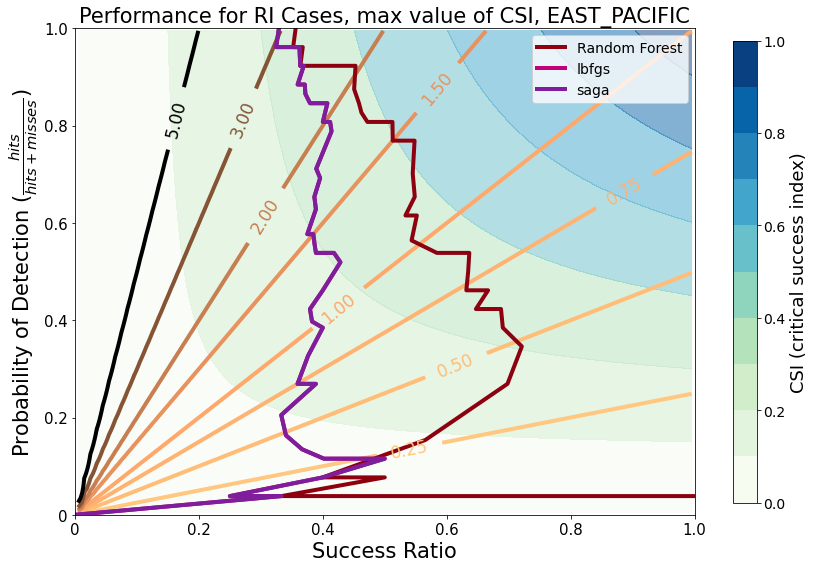

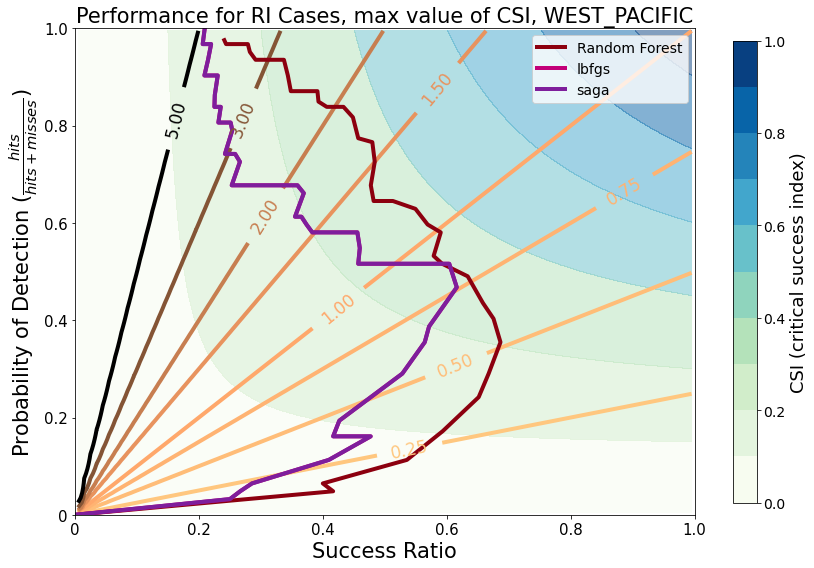

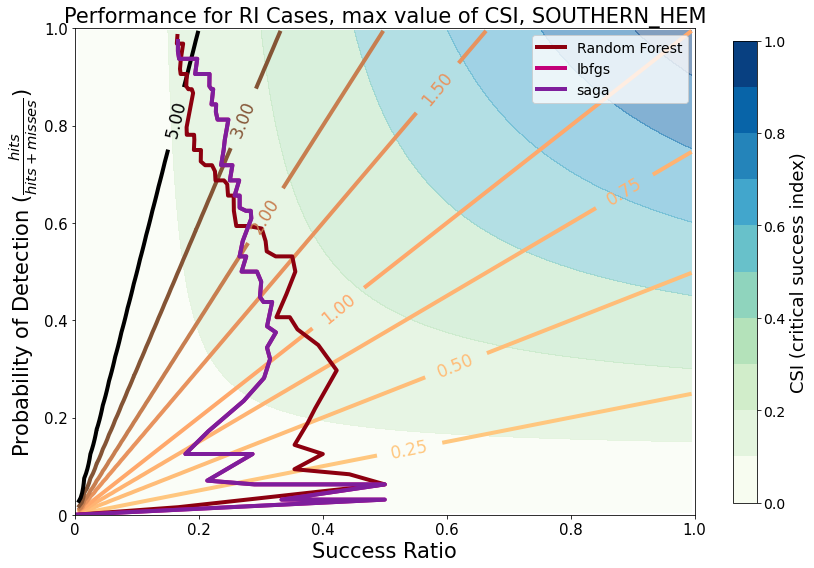

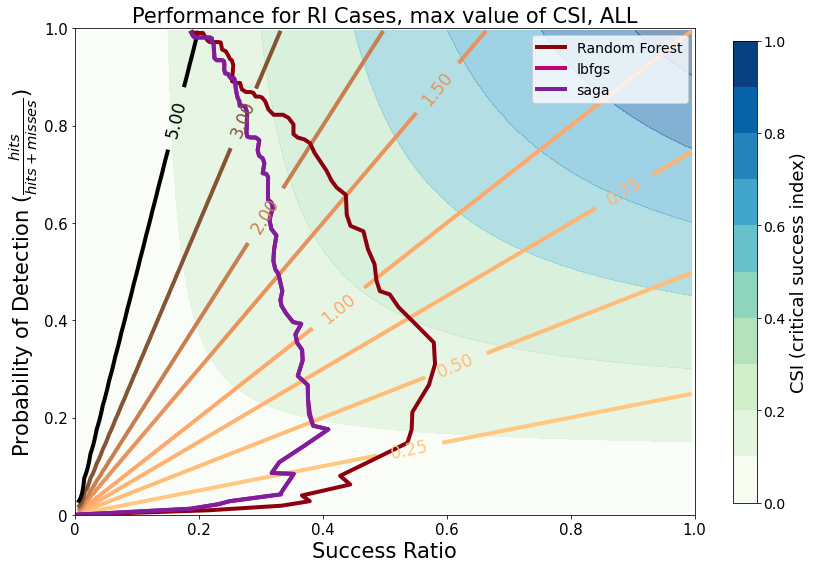

In [22]:
pd_curves = calculate_PD_curves(prec_vs_rec)
metric_plt = 'max'
for basin_sel in basin_ALL:
    fig23,ax23 = plt.subplots(1,1,figsize=(12,8))
    make_performance_diagram_background(ax23)
    #basin_sel = 'ALL'
    #
    plot_PD_curves_compare_models(prec_vs_rec,ax23,basin_sel,metric_plt)
    ax23.set_title('Performance for RI Cases, {metric_plt} value of CSI, {basin_sel}'.format(metric_plt=metric_plt,
                                                                            basin_sel=basin_sel),fontsize=21)
    fig23.tight_layout()
    fig23.savefig('Figures/VALID_Performance_curves_RI_{metric_plt}_CSI_{basin_sel}.{fig_format}'.format(metric_plt=metric_plt,
              basin_sel=basin_sel,fig_format=fig_format),format = fig_format,bbox_inches='tight',dpi=350)

In [23]:
aupd_scores = calc_AUPD(prec_vs_rec)
aupd_scores = aupd_scores.reset_index().rename(columns={0:'AUPD Score'})

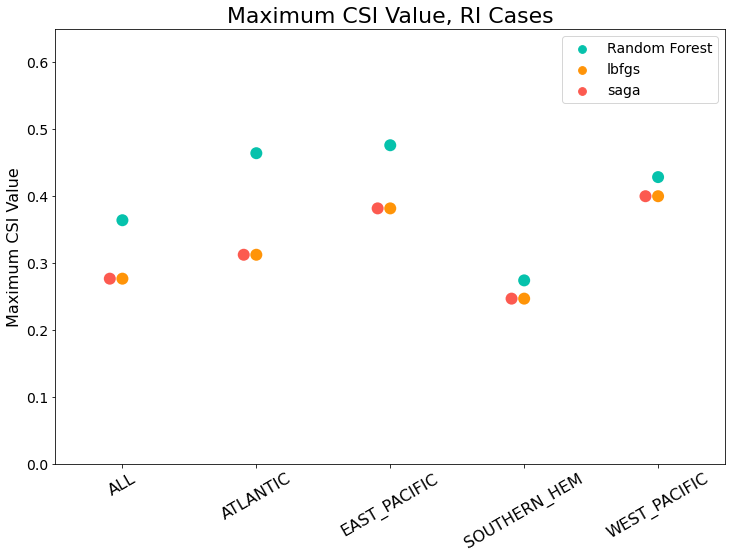

In [24]:
max_CSI_ind = prec_vs_rec.groupby(['BASIN','Model','Fold'])[['CSI','Bias']].agg({'CSI':'max'}).reset_index()

fig16,ax16 = plt.subplots(1,1,figsize=(12,8))
is_swarm = True
if is_swarm:
    sns.swarmplot(data=max_CSI_ind,x='BASIN',y='CSI',hue='Model',ax=ax16,s=12)
    fname_save = 'Figures/VALID_max_CSI_values_SWARM.{fig_format}'.format(fig_format=fig_format)
else:
    sns.boxplot(data=max_CSI_ind,x='BASIN',y='CSI',hue='Model',ax=ax16)
    fname_save = 'Figures/VALID_max_CSI_values_BOX.{fig_format}'.format(fig_format=fig_format)
ax16.set_xlabel(None)
ax16.set_xticklabels(aupd_scores.reset_index()['BASIN'].unique().tolist(),fontsize=16,rotation=30)
ax16.set_ylabel('Maximum CSI Value',fontsize=16)
ax16.tick_params(axis='y',labelsize=14)
ax16.legend(fontsize=14)
ax16.set_ylim([0,0.65])
ax16.set_title('Maximum CSI Value, RI Cases',fontsize=22)
fig16.savefig(fname_save,format=fig_format,dpi=350,bbox_inches='tight')

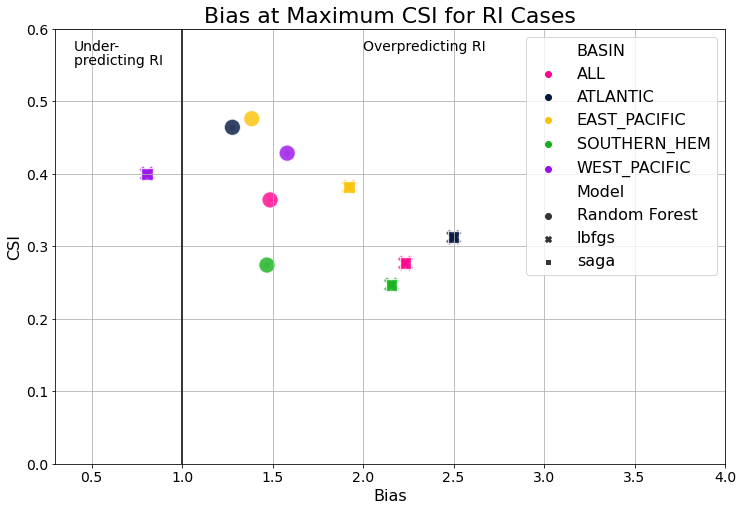

In [25]:
fig20,ax20 = plt.subplots(1,1,figsize=(12,8))
ax20.axvline(1,color='xkcd:charcoal',linewidth=2)
colors_list = ['hot pink','navy','goldenrod','green','violet']
pal_sel = sns.color_palette(sns.xkcd_palette(colors_list),5)
b_c_max = prec_vs_rec.sort_values(['CSI'], ascending=[False]).groupby(['BASIN','Model','Fold']).first()
# Plot
sns.scatterplot(data=b_c_max.reset_index(),x='Bias',y='CSI',hue='BASIN',style='Model',ax=ax20,
                alpha=0.2,legend=False,palette=pal_sel)
# Get mean bias for max CSI of each basin
sns.scatterplot(data=b_c_max.mean(level=(0,1)).reset_index(),
            x='Bias',y='CSI',hue='BASIN',style='Model',s=270,ax=ax20,alpha=0.8,palette=pal_sel)
# Formatting
ax20.legend(fontsize=16)
ax20.tick_params(axis='y',labelsize=14)
ax20.tick_params(axis='x',labelsize=14)
ax20.set_ylabel('CSI',fontsize=16)
ax20.set_xlabel('Bias',fontsize=16)
ax20.grid()
ax20.set_ylim([0,0.6])
ax20.set_xlim([0.3,4])
ax20.text(0.4,0.57,'Under-',fontsize=14)
ax20.text(0.4,0.55,'predicting RI',fontsize=14)
ax20.text(2,0.57,'Overpredicting RI',fontsize=14)
ax20.set_title('Bias at Maximum CSI for RI Cases',fontsize=22)
fig20.savefig('Figures/VALID_bias_vs_CSI_RI_cases_ALL.{fig_format}'.format(fig_format=fig_format),
              format=fig_format,dpi=350,bbox_inches='tight')

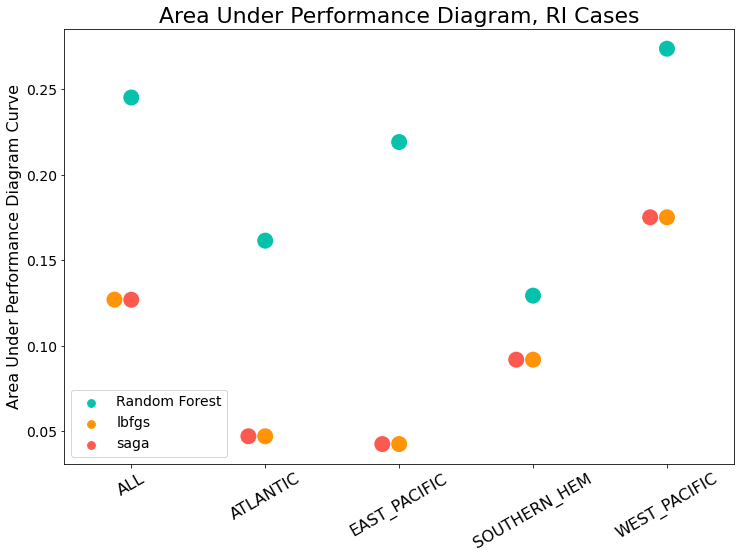

In [26]:
fig15,ax15 = plt.subplots(1,1,figsize=(12,8))
sns.swarmplot(data=aupd_scores.reset_index(),x='BASIN',y='AUPD Score',hue='Model',ax=ax15,s=16)
ax15.set_xlabel(None)
ax15.set_xticklabels(aupd_scores.reset_index()['BASIN'].unique().tolist(),fontsize=16,rotation=30)
ax15.set_ylabel('Area Under Performance Diagram Curve',fontsize=16)
ax15.tick_params(axis='y',labelsize=14)
ax15.legend(fontsize=14)
ax15.set_title('Area Under Performance Diagram, RI Cases',fontsize=22)
fig15.savefig('Figures/VALID_AUPD_values_RI_cases.{fig_format}'.format(fig_format=fig_format),
            format=fig_format,dpi=350,bbox_inches='tight')